In [2]:
import cv2
import io
import time
import numpy as np
import matplotlib.pyplot as plt


END VIDEO


<ipython-input-15-f0471f022452>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  plot_img_np = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


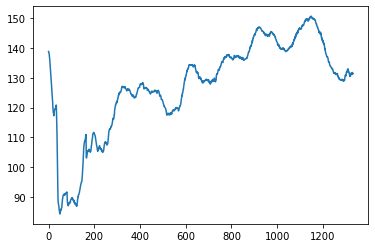

In [15]:
cap = cv2.VideoCapture("142-108.mov")
#cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
#cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
#cap.set(cv2.CAP_PROP_FPS, 30)

check = list()
fig = plt.figure()
ax = fig.add_subplot(111)
count=0
ret, frame = cap.read()
while (ret):
        ret, frame = cap.read()
        if not ret:
            print("END VIDEO")
            break

        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        x, y, w, h = 900, 60, 100, 100    
        crop_img = img[y:y + h, x:x + w]
        cv2.imshow('Crop', crop_img)
        check.append(np.average(crop_img)+25)
        count+=1
        if cv2.waitKey(1) == ord('q'):
            break            
time = range(0,len(check)) 
ax.plot(time, check)
fig.canvas.draw()
plot_img_np = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
plot_img_np = plot_img_np.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#plt.cla()
cv2.imshow('Graph', plot_img_np) 

cap.release()
cv2.destroyAllWindows()

<ipython-input-8-d48113209740>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='b',LineWidth=2,label='Noisy')
C:\Users\flora\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.4)

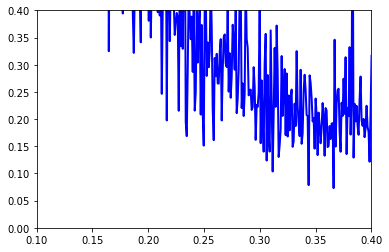

In [8]:
import matplotlib.pyplot as plt
y=check
n = len(time)
fhat = np.fft.fft(y,n)
PSD = fhat * np.conj(fhat)/n
maxim = fhat * np.conj(fhat)/n
freq = (1/n)*np.arange(n)
L = np.arange(1,np.floor(n), dtype='int')
plt.cla()
#plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='b',LineWidth=2,label='Noisy')
plt.xlim(0.1,0.4)
plt.ylim(0,0.4)

[8.95510319e-03+0.j 8.95510319e-03+0.j 2.65177245e-02+0.j ...
 3.92703769e+04+0.j 3.92703769e+04+0.j 1.97039732e+07+0.j]
[ 1.48355445e+05-4.12114787e-13j  2.57108968e+03+6.10364718e+03j
 -1.69766621e+03+2.15013021e+03j ...  1.30333013e+02-2.14353482e+03j
 -1.69766621e+03-2.15013021e+03j  2.57108968e+03-6.10364718e+03j]


<ipython-input-9-60d6f5d8dc08>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time,fflit,color='k',LineWidth=2,label='filter')
C:\Users\flora\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


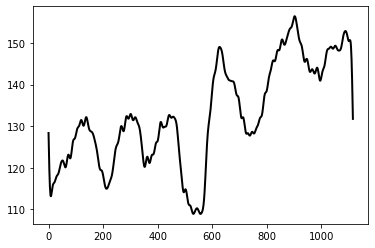

In [9]:
maxim.sort()
print(maxim)
m = (maxim[-2]+maxim[-1])/2500000
indices = PSD > m
PSDclean = PSD * indices
fhat = indices * fhat
print(fhat)
fflit = np.fft.ifft(fhat)

plt.plot(time,fflit,color='k',LineWidth=2,label='filter')
#plt.plot(freq[L],PSDclean[L],color='k',LineWidth=2,label='Noisy')
#plt.xlim(0.1,0.4)
#plt.ylim(-1,1)
plt.show()